In [89]:
import json
import numpy as np
from matplotlib import cm
import ipyvolume as ipv

from tyssue import Sheet
from tyssue.io import hdf5
from tyssue.draw.plt_draw import  quick_edge_draw

%matplotlib inline

In [90]:
ls

Particles export.ipynb  Using Matplotlib.ipynb  Using Vispy.ipynb
Using ipyvolume.ipynb   Using ThreeJS.ipynb


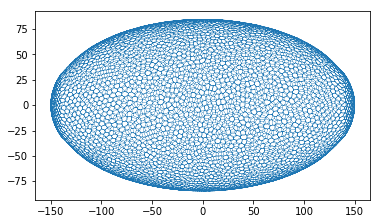

In [94]:
dsets = hdf5.load_datasets('../data/hf5/ellipsoid_sheet_init.hf5',
                           data_names=['vert', 'edge', 'face'])

with open('../data/json/ellipsoid.json', 'r+') as fp:
    specs = json.load(fp)

specs = {k:specs[k] for k in specs if k != 'cell'}
sheet = Sheet('ellipse', dsets, specs)
sheet.settings['threshold_length'] = 1e-3

fig, ax = quick_edge_draw(sheet, coords=list('zx'), lw=0.2)

In [96]:

ipv.clear()
ipv.style.use('dark')

cmap = cm.viridis((sheet.vert_df.y - sheet.vert_df.y.min())
                  /sheet.vert_df.y.ptp())
ipv.plot_trisurf(sheet.vert_df.x.values,
                 sheet.vert_df.y.values,
                 sheet.vert_df.z.values,
                 triangles=[[0,0,0], [0,0,1]],
                 lines=sheet.edge_df[['srce', 'trgt']].values,
                 color=cmap[:, :3])


fig = ipv.gcf()

ipv.xyzlim(-150, 150)
ipv.show()

A Jupyter Widget

In [ ]:
## Not clear on how to use this...

my_style = {'axes': {'color': 'white',
            'label': {'color': 'white'},
            'ticklabel': {'color': 'white'},
            'visible': True},
            'background-color': 'black',
            'box': {'visible': False}}

my_style = ipv.styles.create('my_style', my_style)